<a href="https://colab.research.google.com/github/chu-ise/378A-2022/blob/main/notebooks/05/01_pos_tagger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Korean POS Taggers

## Preparing the environment

In [1]:
%%capture
%pip install konlpy
%pip install ekorpkit[tokenize]==0.1.12.post0.dev26

In [21]:
%%capture
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [15]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
import os

WORKSPACE_DIR = "../../workspace" 
print(f'WORKSPACE_DIR = {WORKSPACE_DIR}')
data_dir = os.path.join(WORKSPACE_DIR, "data")
os.makedirs(data_dir, exist_ok=True)

WORKSPACE_DIR = ../../workspace


In [3]:
import gdown
import os
id = "1uDxxBNZ-qZscPjdEam0QEjTdKcFUBMuy"

data_file = "bok_minutes.csv"
# gdown.download(id=id, output=data_file, quiet=False, fuzzy=True)

In [4]:
import pandas as pd
df = pd.read_csv(data_file)
df.head()

,id,filename,mdate,rdate,section,text
0,BOK_20181130_20181218_S1,BOK_20181130_20181218,2018-11-30 10:00:00,2018-12-18 16:00:00,Economic Situation,일부 위원은 관련부서에서 지난 3/4분기 중 유로지역 경제성장 부진을 자동차 관련 ...
1,BOK_20181130_20181218_S2,BOK_20181130_20181218,2018-11-30 10:00:00,2018-12-18 16:00:00,Foreign Currency,일부 위원은 그동안 글로벌펀드와 패시브펀드의 규모가 크게 확대되어 우리나라 자본유출...
2,BOK_20181130_20181218_S3,BOK_20181130_20181218,2018-11-30 10:00:00,2018-12-18 16:00:00,Financial Markets,"일부 위원은 현재 대기업들이 전반적으로는 문제가 없지만, 건설 조선업 등에 속하는 ..."
3,BOK_20181130_20181218_S4,BOK_20181130_20181218,2018-11-30 10:00:00,2018-12-18 16:00:00,Monetary Policy,일부 위원은 최근 경기상황과 금융불균형 등을 고려할 때 확장적 재정정책의 필요성에는...
4,BOK_20181130_20181218_S5,BOK_20181130_20181218,2018-11-30 10:00:00,2018-12-18 16:00:00,Participants’ Views,일부 위원은 최근 실물경제 성장경로의 하방위험이 다소 커진 것으로 보이고 물가도 상...


# Korean POS Taggers

## [eKorpkoit](https://github.com/entelecheia/ekorpkit)

eKorpkit tokenizers
- MeCab: 일본어용 형태소 분석기를 한국어를 사용할 수 있도록 수정
  - https://github.com/polm/fugashi
  - https://github.com/SamuraiT/mecab-python3
  - https://github.com/LuminosoInsight/mecab-ko-dic
- Pynori: Nori의 파이썬 버전 & 순수 파이썬 스크립트로 작성 (ref.Property & Comparision Study)
  - https://github.com/gritmind/python-nori

In [5]:
from ekorpkit.preprocessors.tokenizer import PynoriTokenizer, MecabTokenizer

nori = PynoriTokenizer()
mecab = MecabTokenizer()

[ekorpkit]: Initializing Pynori...
[ekorpkit]: Initializing mecab...)


In [6]:
import konlpy
konlpy.__version__

'0.6.0'

## **KoNLPy**

KoNLPy는 다음과 같은 다양한 형태소 분석, 태깅 라이브러리를 파이썬에서 쉽게 사용할 수 있도록 모아놓았다.

* Hannanum: 한나눔. KAIST Semantic Web Research Center 개발.
  * http://semanticweb.kaist.ac.kr/hannanum/
* Kkma: 꼬꼬마. 서울대학교 IDS(Intelligent Data Systems) 연구실 개발.
  * http://kkma.snu.ac.kr/
* Komoran: 코모란. Shineware에서 개발.
  * https://github.com/shin285/KOMORAN
* Mecab: 메카브. 일본어용 형태소 분석기를 한국어를 사용할 수 있도록 수정.
  * https://bitbucket.org/eunjeon/mecab-ko
* Open Korean Text: 오픈 소스 한국어 분석기. 과거 트위터 형태소 분석기.
  * https://github.com/open-korean-text/open-korean-text

In [7]:
from konlpy.tag import *

hannanum = Hannanum()
kkma = Kkma()
komoran = Komoran()
okt = Okt()

이 클래스들은 다음과 같은 메서드를 공통적으로 제공한다.

* `nouns` : 명사 추출
* `morphs` : 형태소 추출
* `pos` : 품사 부착

### 명사 추출

In [8]:
docs = df['text']
text = docs[0]
sent = text.split('\n')[10]
print(sent)

한편 IMF가 추정한 우리나라의 GDP갭률은 금년에도 소폭의 마이너스(-)를 지속하고 있는데, 잠재성장률 추정의 불확실성을 감안하더라도 최근의 고용상황, 제조업가동률, 물가상승률 등에 비추어 볼 때 동 추정치가 어느 정도 타당성이 있어 보인다고 언급하면서 관련부서의 견해를 물었음.


문자열에서 명사만 추출하려면 `noun` 명령을 사용한다.

In [21]:
%%time
print(hannanum.nouns(sent))

['한편', '추정', '우리나라', 'GDP갭률', '금년', '소폭', '마이너스(-)', '지속', '잠재성장률', '추정', '불확실성', '감안', '최근', '고용상황', '제조업가동률', '물가상승률', '등', '때', '동', '추정치', '정도', '타당성', '언급', '관련부서', '견해']
CPU times: user 57.9 ms, sys: 0 ns, total: 57.9 ms
Wall time: 47.7 ms


In [22]:
%%time
print(kkma.nouns(sent))

['한편', '추정', '우리', '우리나라', '나라', '갭', '금년', '소폭', '마이너스', '지속', '잠재', '잠재성장률', '성장률', '불확실', '감안', '최근', '고용', '고용상황', '상황', '제조업', '제조업가동률', '가동률', '물가', '물가상승률', '상승률', '등', '때', '동', '추', '추정치', '정치', '정도', '타당성', '언급', '관련', '관련부서', '부서', '견해']
CPU times: user 269 ms, sys: 1.96 ms, total: 271 ms
Wall time: 247 ms


In [23]:
%%time
print(komoran.nouns(sent))

['한편', '추정', '우리나라', '갭', '금년', '소폭', '마이너스', '지속', '잠재', '성장률', '추정', '불확실성', '감안', '최근', '고용', '상황', '제조업', '가동', '물가', '상승', '등', '때', '추정', '정도', '타당성', '언급', '관련', '부서', '견해']
CPU times: user 9.68 ms, sys: 1.02 ms, total: 10.7 ms
Wall time: 10.2 ms


In [24]:
%%time
print(okt.nouns(sent))

['한편', '추정', '우리나라', '률', '금년', '폭', '마이너스', '를', '지속', '잠재', '성장', '률', '추정', '불확실', '감안', '최근', '고용', '상황', '제조업', '률', '물가상승률', '등', '볼', '때', '추정', '치가', '정도', '타당성', '언급', '관련', '부서', '견해']
CPU times: user 73.4 ms, sys: 957 µs, total: 74.3 ms
Wall time: 74.8 ms


In [25]:
%%time
print(nori.nouns(sent))

['한편', 'imf', '추정', '우리나라', 'gdp', '갭', '률', '금년', '소폭', '마이너스', '지속', '잠재성', '장률', '추정', '확실', '성', '감안', '최근', '고용', '상황', '제조업', '가동', '률', '물가', '상', '승률', '등', '때', '동', '추정', '정도', '타당', '성', '언급', '관련', '부서', '견해']
CPU times: user 210 ms, sys: 22 µs, total: 210 ms
Wall time: 228 ms


In [26]:
%%time
print(mecab.nouns(sent))

['한편', 'IMF', '추정', '우리나라', 'GDP', '갭', '률', '금년', '소폭', '마이너스', '지속', '잠재', '성장', '률', '추정', '확실', '성', '감안', '최근', '고용', '상황', '제조업', '가동', '률', '물가', '상승', '률', '등', '때', '동', '추정', '정도', '타당', '성', '언급', '관련', '부서', '견해']
CPU times: user 5.68 ms, sys: 5.97 ms, total: 11.7 ms
Wall time: 16.2 ms


### 형태소 추출

In [27]:
print(hannanum.morphs(sent))

['한편', 'IMF', '가', '추정', '하', 'ㄴ', '우리나라', '의', 'GDP갭률', '은', '금년', '에도', '소폭', '의', '마이너스(-)', '를', '지속', '하고', '있', '는데', ',', '잠재성장률', '추정', '의', '불확실성', '을', '감안', '하', '더라도', '최근', '의', '고용상황', ',', '제조업가동률', ',', '물가상승률', '등', '에', '비추', '어', '보', 'ㄹ', '때', '동', '추정치', '가', '어느', '정도', '타당성', '이', '있', '어', '보이', 'ㄴ다', '고', '언급', '하', '면서', '관련부서', '의', '견해', '를', '묻', '었음', '.']


In [28]:
print(kkma.morphs(sent))

['한편', 'IMF', '가', '추정', '하', 'ㄴ', '우리나라', '의', 'GDP', '갭', '률', '은', '금년', '에', '도', '소폭', '의', '마이너스', '(', '-', ')', '를', '지속', '하', '고', '있', '는데', ',', '잠재', '성장률', '추정', '의', '불확실', '성', '을', '감안', '하', '더라도', '최근', '의', '고용', '상황', ',', '제조업', '가동률', ',', '물가', '상승률', '등', '에', '비추', '어', '보', 'ㄹ', '때', '동', '추', '정치', '가', '어느', '정도', '타당성', '이', '있', '어', '보이', 'ㄴ다고', '언급', '하', '면서', '관련', '부서', '의', '견해', '를', '묻', '었', '음', '.']


In [29]:
print(komoran.morphs(sent))

['한편', 'IMF', '가', '추정', '하', 'ㄴ', '우리나라', '의', 'GDP', '갭', '률', '은', '금년', '에', '도', '소폭', '의', '마이너스', '(', '-', ')', '를', '지속', '하', '고', '있', '는데', ',', '잠재', '성장률', '추정', '의', '불확실성', '을', '감안', '하', '더라도', '최근', '의', '고용', '상황', ',', '제조업', '가동', '률', ',', '물가', '상승', '률', '등', '에', '비추', '어', '보', 'ㄹ', '때', '동', '추정', '치', '가', '어느', '정도', '타당성', '이', '있', '어', '보이', 'ㄴ다고', '언급', '하', '면서', '관련', '부서', '의', '견해', '를', '묻', '었', '음', '.']


In [30]:
print(okt.morphs(sent))

['한편', 'IMF', '가', '추정', '한', '우리나라', '의', 'GDP', '갭', '률', '은', '금년', '에도', '소', '폭', '의', '마이너스', '(-)', '를', '지속', '하고', '있는데', ',', '잠재', '성장', '률', '추정', '의', '불확실', '성', '을', '감안', '하더라도', '최근', '의', '고용', '상황', ',', '제조업', '가', '동', '률', ',', '물가상승률', '등', '에', '비추어', '볼', '때', '동', '추정', '치가', '어느', '정도', '타당성', '이', '있어', '보인다고', '언급', '하면서', '관련', '부서', '의', '견해', '를', '물었음', '.']


In [31]:
print(nori.tokens(sent))

['한편', 'imf', '가', '추정', '한', '우리나라', '의', 'gdp', '갭', '률', '은', '금년', '에', '도', '소폭', '의', '마이너스', '(', '-', ')', '를', '지속', '하', '고', '있', '는데', ',', '잠재성', '장률', '추정', '의', '불', '확실', '성', '을', '감안', '하', '더라도', '최근', '의', '고용', '상황', ',', '제조업', '가동', '률', ',', '물가', '상', '승률', '등', '에', '비추', '어', '볼', '때', '동', '추정', '치가', '어느', '정도', '타당', '성', '이', '있', '어', '보인다고', '언급', '하', '면서', '관련', '부서', '의', '견해', '를', '물', '었', '음', '.']


In [32]:
print(mecab.tokens(sent))

['한편', 'IMF', '가', '추정', '한', '우리나라', '의', 'GDP', '갭', '률', '은', '금년', '에', '도', '소폭', '의', '마이너스', '(', '-)', '를', '지속', '하', '고', '있', '는데', ',', '잠재', '성장', '률', '추정', '의', '불', '확실', '성', '을', '감안', '하', '더라도', '최근', '의', '고용', '상황', ',', '제조업', '가동', '률', ',', '물가', '상승', '률', '등', '에', '비추', '어', '볼', '때', '동', '추정', '치가', '어느', '정도', '타당', '성', '이', '있', '어', '보인다고', '언급', '하', '면서', '관련', '부서', '의', '견해', '를', '물', '었', '음', '.']


### 품사 부착 (Parts of Speach Tagging)

`pos` 명령을 사용하면 품사 부착을 한다. 

한국어 품사 태그세트로는 "21세기 세종계획 품사 태그세트"를 비롯하여 다양한 품사 태그세트가 있다. 형태소 분석기마다 사용하는 품사 태그가 다르므로 각 형태소 분석기에 대한 문서를 참조한다.

In [33]:
print(hannanum.pos(sent))

[('한편', 'N'), ('IMF', 'F'), ('가', 'J'), ('추정', 'N'), ('하', 'X'), ('ㄴ', 'E'), ('우리나라', 'N'), ('의', 'J'), ('GDP갭률', 'N'), ('은', 'J'), ('금년', 'N'), ('에도', 'J'), ('소폭', 'N'), ('의', 'J'), ('마이너스(-)', 'N'), ('를', 'J'), ('지속', 'N'), ('하고', 'J'), ('있', 'P'), ('는데', 'E'), (',', 'S'), ('잠재성장률', 'N'), ('추정', 'N'), ('의', 'J'), ('불확실성', 'N'), ('을', 'J'), ('감안', 'N'), ('하', 'X'), ('더라도', 'E'), ('최근', 'N'), ('의', 'J'), ('고용상황', 'N'), (',', 'S'), ('제조업가동률', 'N'), (',', 'S'), ('물가상승률', 'N'), ('등', 'N'), ('에', 'J'), ('비추', 'P'), ('어', 'E'), ('보', 'P'), ('ㄹ', 'E'), ('때', 'N'), ('동', 'N'), ('추정치', 'N'), ('가', 'J'), ('어느', 'M'), ('정도', 'N'), ('타당성', 'N'), ('이', 'J'), ('있', 'P'), ('어', 'E'), ('보이', 'P'), ('ㄴ다', 'E'), ('고', 'J'), ('언급', 'N'), ('하', 'X'), ('면서', 'E'), ('관련부서', 'N'), ('의', 'J'), ('견해', 'N'), ('를', 'J'), ('묻', 'P'), ('었음', 'E'), ('.', 'S')]


In [34]:
print(kkma.pos(sent))

[('한편', 'NNG'), ('IMF', 'OL'), ('가', 'JKS'), ('추정', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('우리나라', 'NNG'), ('의', 'JKG'), ('GDP', 'OL'), ('갭', 'NNG'), ('률', 'XSN'), ('은', 'JX'), ('금년', 'NNG'), ('에', 'JKM'), ('도', 'JX'), ('소폭', 'NNG'), ('의', 'JKG'), ('마이너스', 'NNG'), ('(', 'SS'), ('-', 'SW'), (')', 'SS'), ('를', 'JKO'), ('지속', 'NNG'), ('하', 'XSV'), ('고', 'ECE'), ('있', 'VXV'), ('는데', 'ECD'), (',', 'SP'), ('잠재', 'NNG'), ('성장률', 'NNG'), ('추정', 'NNG'), ('의', 'JKG'), ('불확실', 'NNG'), ('성', 'XSN'), ('을', 'JKO'), ('감안', 'NNG'), ('하', 'XSV'), ('더라도', 'ECD'), ('최근', 'NNG'), ('의', 'JKG'), ('고용', 'NNG'), ('상황', 'NNG'), (',', 'SP'), ('제조업', 'NNG'), ('가동률', 'NNG'), (',', 'SP'), ('물가', 'NNG'), ('상승률', 'NNG'), ('등', 'NNB'), ('에', 'JKM'), ('비추', 'VV'), ('어', 'ECD'), ('보', 'VV'), ('ㄹ', 'ETD'), ('때', 'NNG'), ('동', 'NNG'), ('추', 'NNG'), ('정치', 'NNG'), ('가', 'JKS'), ('어느', 'MDT'), ('정도', 'NNG'), ('타당성', 'NNG'), ('이', 'JKS'), ('있', 'VV'), ('어', 'ECD'), ('보이', 'VV'), ('ㄴ다고', 'ECE'), ('언급', 'NNG'), ('하', 'XSV'), ('

In [35]:
print(komoran.pos(sent))

[('한편', 'NNG'), ('IMF', 'SL'), ('가', 'JKS'), ('추정', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETM'), ('우리나라', 'NNP'), ('의', 'JKG'), ('GDP', 'SL'), ('갭', 'NNG'), ('률', 'XSN'), ('은', 'JX'), ('금년', 'NNG'), ('에', 'JKB'), ('도', 'JX'), ('소폭', 'NNG'), ('의', 'JKG'), ('마이너스', 'NNP'), ('(', 'SS'), ('-', 'SS'), (')', 'SS'), ('를', 'JKO'), ('지속', 'NNG'), ('하', 'XSV'), ('고', 'EC'), ('있', 'VV'), ('는데', 'EC'), (',', 'SP'), ('잠재', 'NNG'), ('성장률', 'NNG'), ('추정', 'NNG'), ('의', 'JKG'), ('불확실성', 'NNG'), ('을', 'JKO'), ('감안', 'NNG'), ('하', 'XSV'), ('더라도', 'EC'), ('최근', 'NNG'), ('의', 'JKG'), ('고용', 'NNP'), ('상황', 'NNP'), (',', 'SP'), ('제조업', 'NNG'), ('가동', 'NNG'), ('률', 'XSN'), (',', 'SP'), ('물가', 'NNG'), ('상승', 'NNG'), ('률', 'XSN'), ('등', 'NNB'), ('에', 'JKB'), ('비추', 'VV'), ('어', 'EC'), ('보', 'VV'), ('ㄹ', 'ETM'), ('때', 'NNG'), ('동', 'MM'), ('추정', 'NNG'), ('치', 'XSN'), ('가', 'JKS'), ('어느', 'MM'), ('정도', 'NNG'), ('타당성', 'NNP'), ('이', 'JKS'), ('있', 'VV'), ('어', 'EC'), ('보이', 'VV'), ('ㄴ다고', 'EC'), ('언급', 'NNG'), ('하', 'XSV')

In [38]:
print(okt.pos(sent))

[('한편', 'Noun'), ('IMF', 'Alpha'), ('가', 'Verb'), ('추정', 'Noun'), ('한', 'Josa'), ('우리나라', 'Noun'), ('의', 'Josa'), ('GDP', 'Alpha'), ('갭', 'Verb'), ('률', 'Noun'), ('은', 'Josa'), ('금년', 'Noun'), ('에도', 'Josa'), ('소', 'Modifier'), ('폭', 'Noun'), ('의', 'Josa'), ('마이너스', 'Noun'), ('(-)', 'Punctuation'), ('를', 'Noun'), ('지속', 'Noun'), ('하고', 'Josa'), ('있는데', 'Adjective'), (',', 'Punctuation'), ('잠재', 'Noun'), ('성장', 'Noun'), ('률', 'Noun'), ('추정', 'Noun'), ('의', 'Josa'), ('불확실', 'Noun'), ('성', 'Suffix'), ('을', 'Josa'), ('감안', 'Noun'), ('하더라도', 'Verb'), ('최근', 'Noun'), ('의', 'Josa'), ('고용', 'Noun'), ('상황', 'Noun'), (',', 'Punctuation'), ('제조업', 'Noun'), ('가', 'Josa'), ('동', 'Modifier'), ('률', 'Noun'), (',', 'Punctuation'), ('물가상승률', 'Noun'), ('등', 'Noun'), ('에', 'Josa'), ('비추어', 'Verb'), ('볼', 'Noun'), ('때', 'Noun'), ('동', 'Modifier'), ('추정', 'Noun'), ('치가', 'Noun'), ('어느', 'Adverb'), ('정도', 'Noun'), ('타당성', 'Noun'), ('이', 'Josa'), ('있어', 'Adjective'), ('보인다고', 'Verb'), ('언급', 'Noun'), ('하면서',

In [36]:
print(nori.parse(sent))

['한편/NNG', ' /SP', 'imf/SL', '가/JKS', ' /SP', '추정/NNG', '한/XSV+ETM', ' /SP', '우리나라/NNG', '의/JKG', ' /SP', 'gdp/SL', '갭/NNG', '률/XSN', '은/JX', ' /SP', '금년/NNG', '에/JKB', '도/JX', ' /SP', '소폭/NNG', '의/JKG', ' /SP', '마이너스/NNG', '(/SSO', '-/SY', ')/SSC', '를/JKO', ' /SP', '지속/NNG', '하/XSA', '고/EC', ' /SP', '있/VX', '는데/EC', ',/SC', ' /SP', '잠재성/NNG', '장률/NNG', ' /SP', '추정/NNG', '의/JKG', ' /SP', '불/XPN', '확실/XR', '성/XSN', '을/JKO', ' /SP', '감안/NNG', '하/XSV', '더라도/EC', ' /SP', '최근/NNG', '의/JKG', ' /SP', '고용/NNG', '상황/NNG', ',/SC', ' /SP', '제조업/NNG', '가동/NNG', '률/XSN', ',/SC', ' /SP', '물가/NNG', '상/XSN', '승률/NNG', ' /SP', '등/NNB', '에/JKB', ' /SP', '비추/VV', '어/EC', ' /SP', '볼/VX+ETM', ' /SP', '때/NNG', ' /SP', '동/NNG', ' /SP', '추정/NNG', '치가/XSV+EC+JKS', ' /SP', '어느/MM', ' /SP', '정도/NNG', ' /SP', '타당/XR', '성/XSN', '이/JKS', ' /SP', '있/VV', '어/EC', ' /SP', '보인다고/VV+EC', ' /SP', '언급/NNG', '하/XSV', '면서/EC', ' /SP', '관련/NNG', '부서/NNG', '의/JKG', ' /SP', '견해/NNG', '를/JKO', ' /SP', '물/VV', '었/EP', '음/ETN', '

In [37]:
print(mecab.parse(sent))

['한편/NNG', ' /SP', 'IMF/SL', '가/JKS', ' /SP', '추정/NNG', '한/XSA+ETM', ' /SP', '우리나라/NNG', '의/JKG', ' /SP', 'GDP/SL', '갭/NNG', '률/XSN', '은/JX', ' /SP', '금년/NNG', '에/JKB', '도/JX', ' /SP', '소폭/NNG', '의/JKG', ' /SP', '마이너스/NNG', '(/SSO', '-)/SY', '를/JKO', ' /SP', '지속/NNG', '하/XSV', '고/EC', ' /SP', '있/VX', '는데/EC', ',/SC', ' /SP', '잠재/NNG', '성장/NNG', '률/XSN', ' /SP', '추정/NNG', '의/JKG', ' /SP', '불/XPN', '확실/XR', '성/XSN', '을/JKO', ' /SP', '감안/NNG', '하/XSV', '더라도/EC', ' /SP', '최근/NNG', '의/JKG', ' /SP', '고용/NNG', '상황/NNG', ',/SC', ' /SP', '제조업/NNG', '가동/NNG', '률/XSN', ',/SC', ' /SP', '물가/NNG', '상승/NNG', '률/XSN', ' /SP', '등/NNB', '에/JKB', ' /SP', '비추/VV', '어/EC', ' /SP', '볼/VX+ETM', ' /SP', '때/NNG', ' /SP', '동/NNG', ' /SP', '추정/NNG', '치가/XSA+EC+JKS', ' /SP', '어느/MM', ' /SP', '정도/NNG', ' /SP', '타당/XR', '성/XSN', '이/JKS', ' /SP', '있/VV', '어/EC', ' /SP', '보인다고/VV+EC', ' /SP', '언급/NNG', '하/XSV', '면서/EC', ' /SP', '관련/NNG', '부서/NNG', '의/JKG', ' /SP', '견해/NNG', '를/JKO', ' /SP', '물/VV', '었/EP', '음/ETN', '

부착되는 품사 태그의 기호와 의미는 `tagset` 속성으로 확인할 수 있다.

In [39]:
okt.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

## Zipf’s law (word frequency plot)

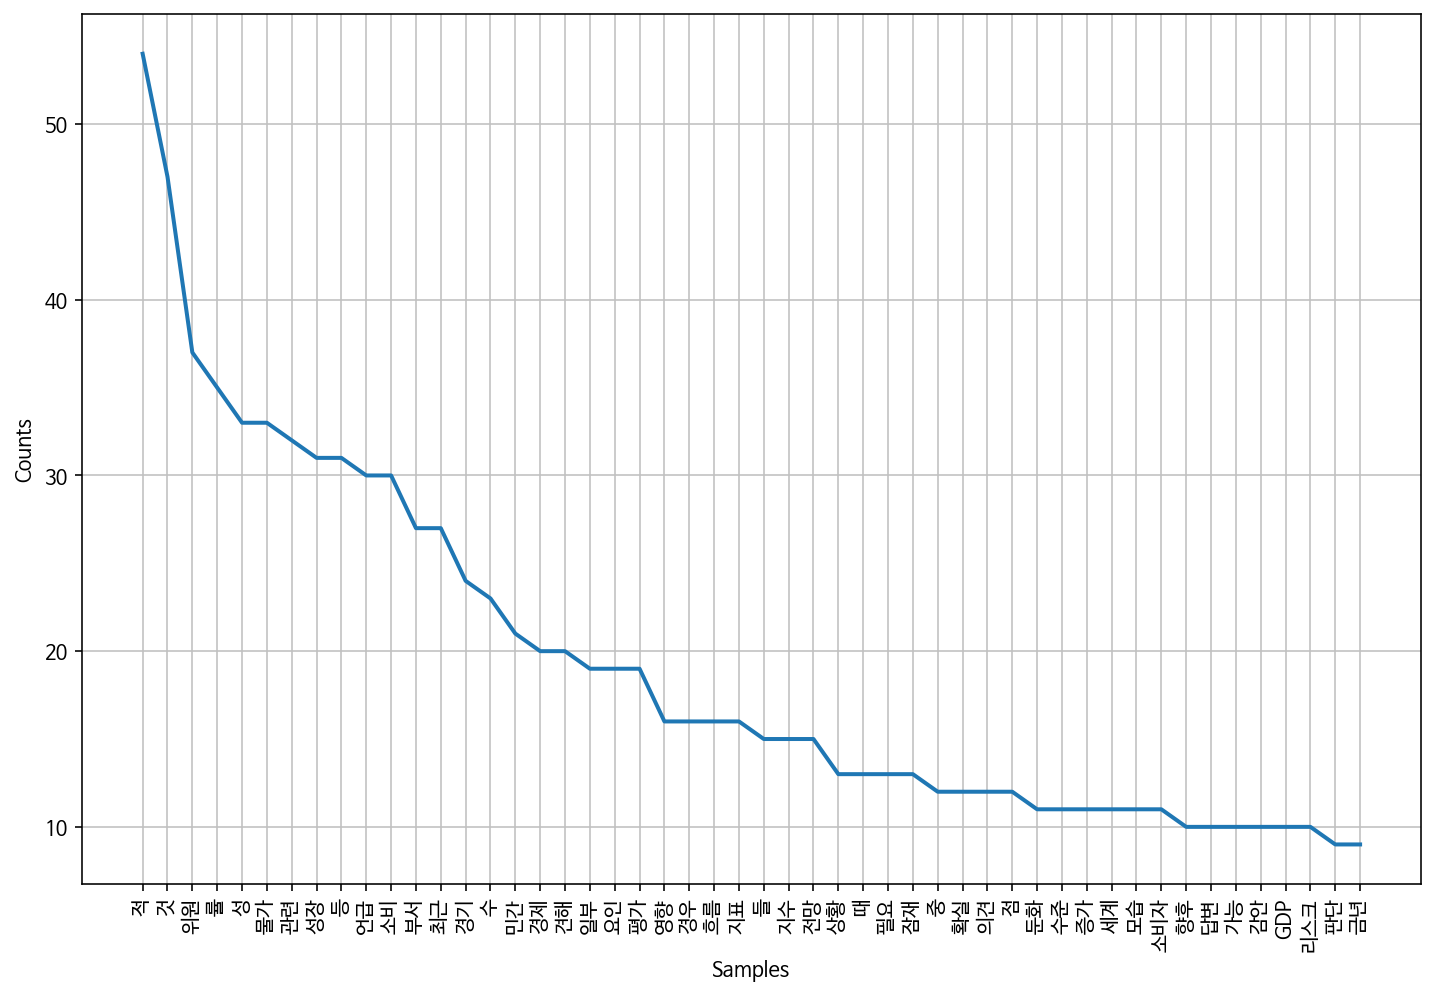

In [16]:
from nltk import Text

bok = Text(mecab.nouns(text), name="bok")
plt.figure(figsize=(12, 8))
bok.plot(50)
plt.show()

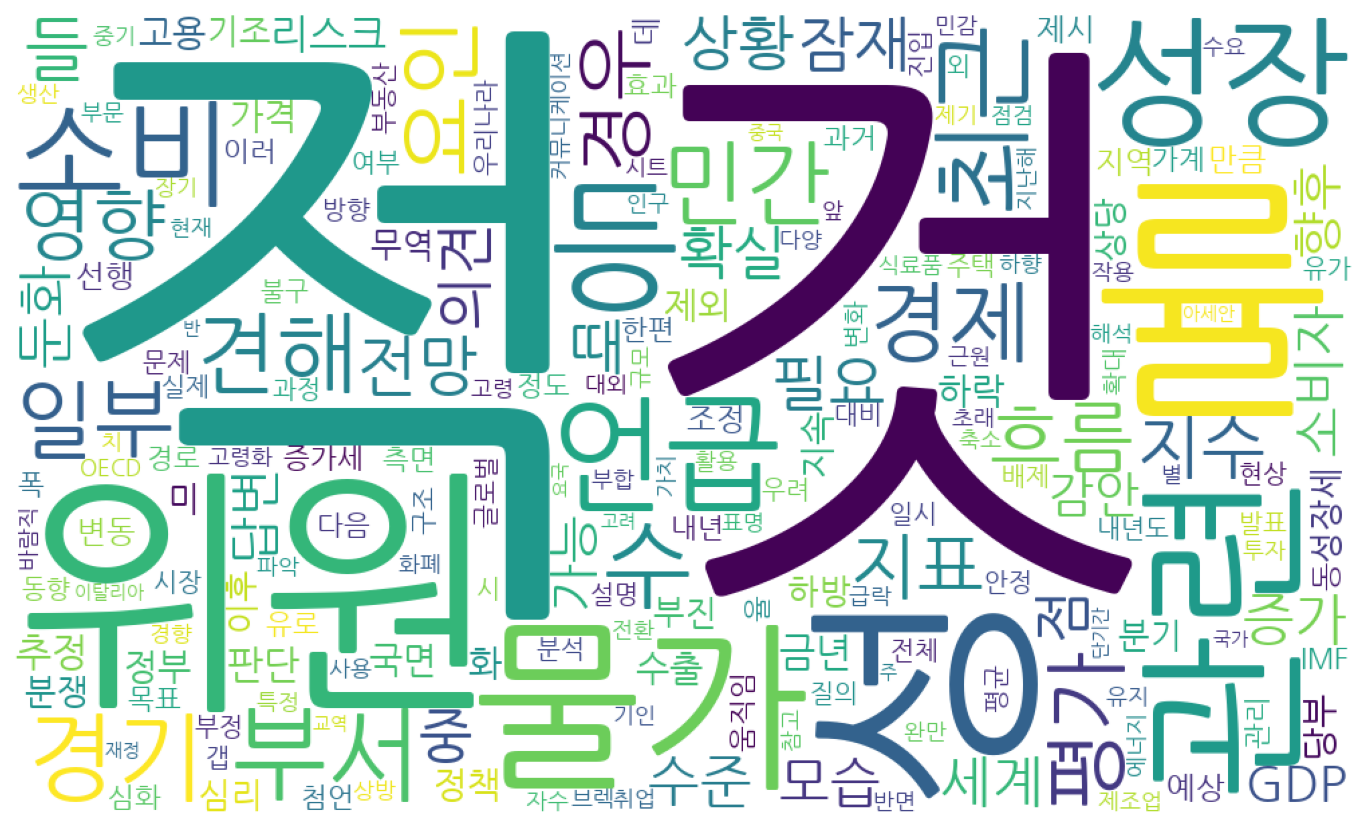

In [20]:
from wordcloud import WordCloud

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

wc = WordCloud(width = 1200, height = 800, background_color="white", font_path=font_path)
plt.figure(figsize=(12, 8))
plt.imshow(wc.generate_from_frequencies(bok.vocab()))
plt.axis("off")
plt.show()